In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# EDA

# HeartDisease

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


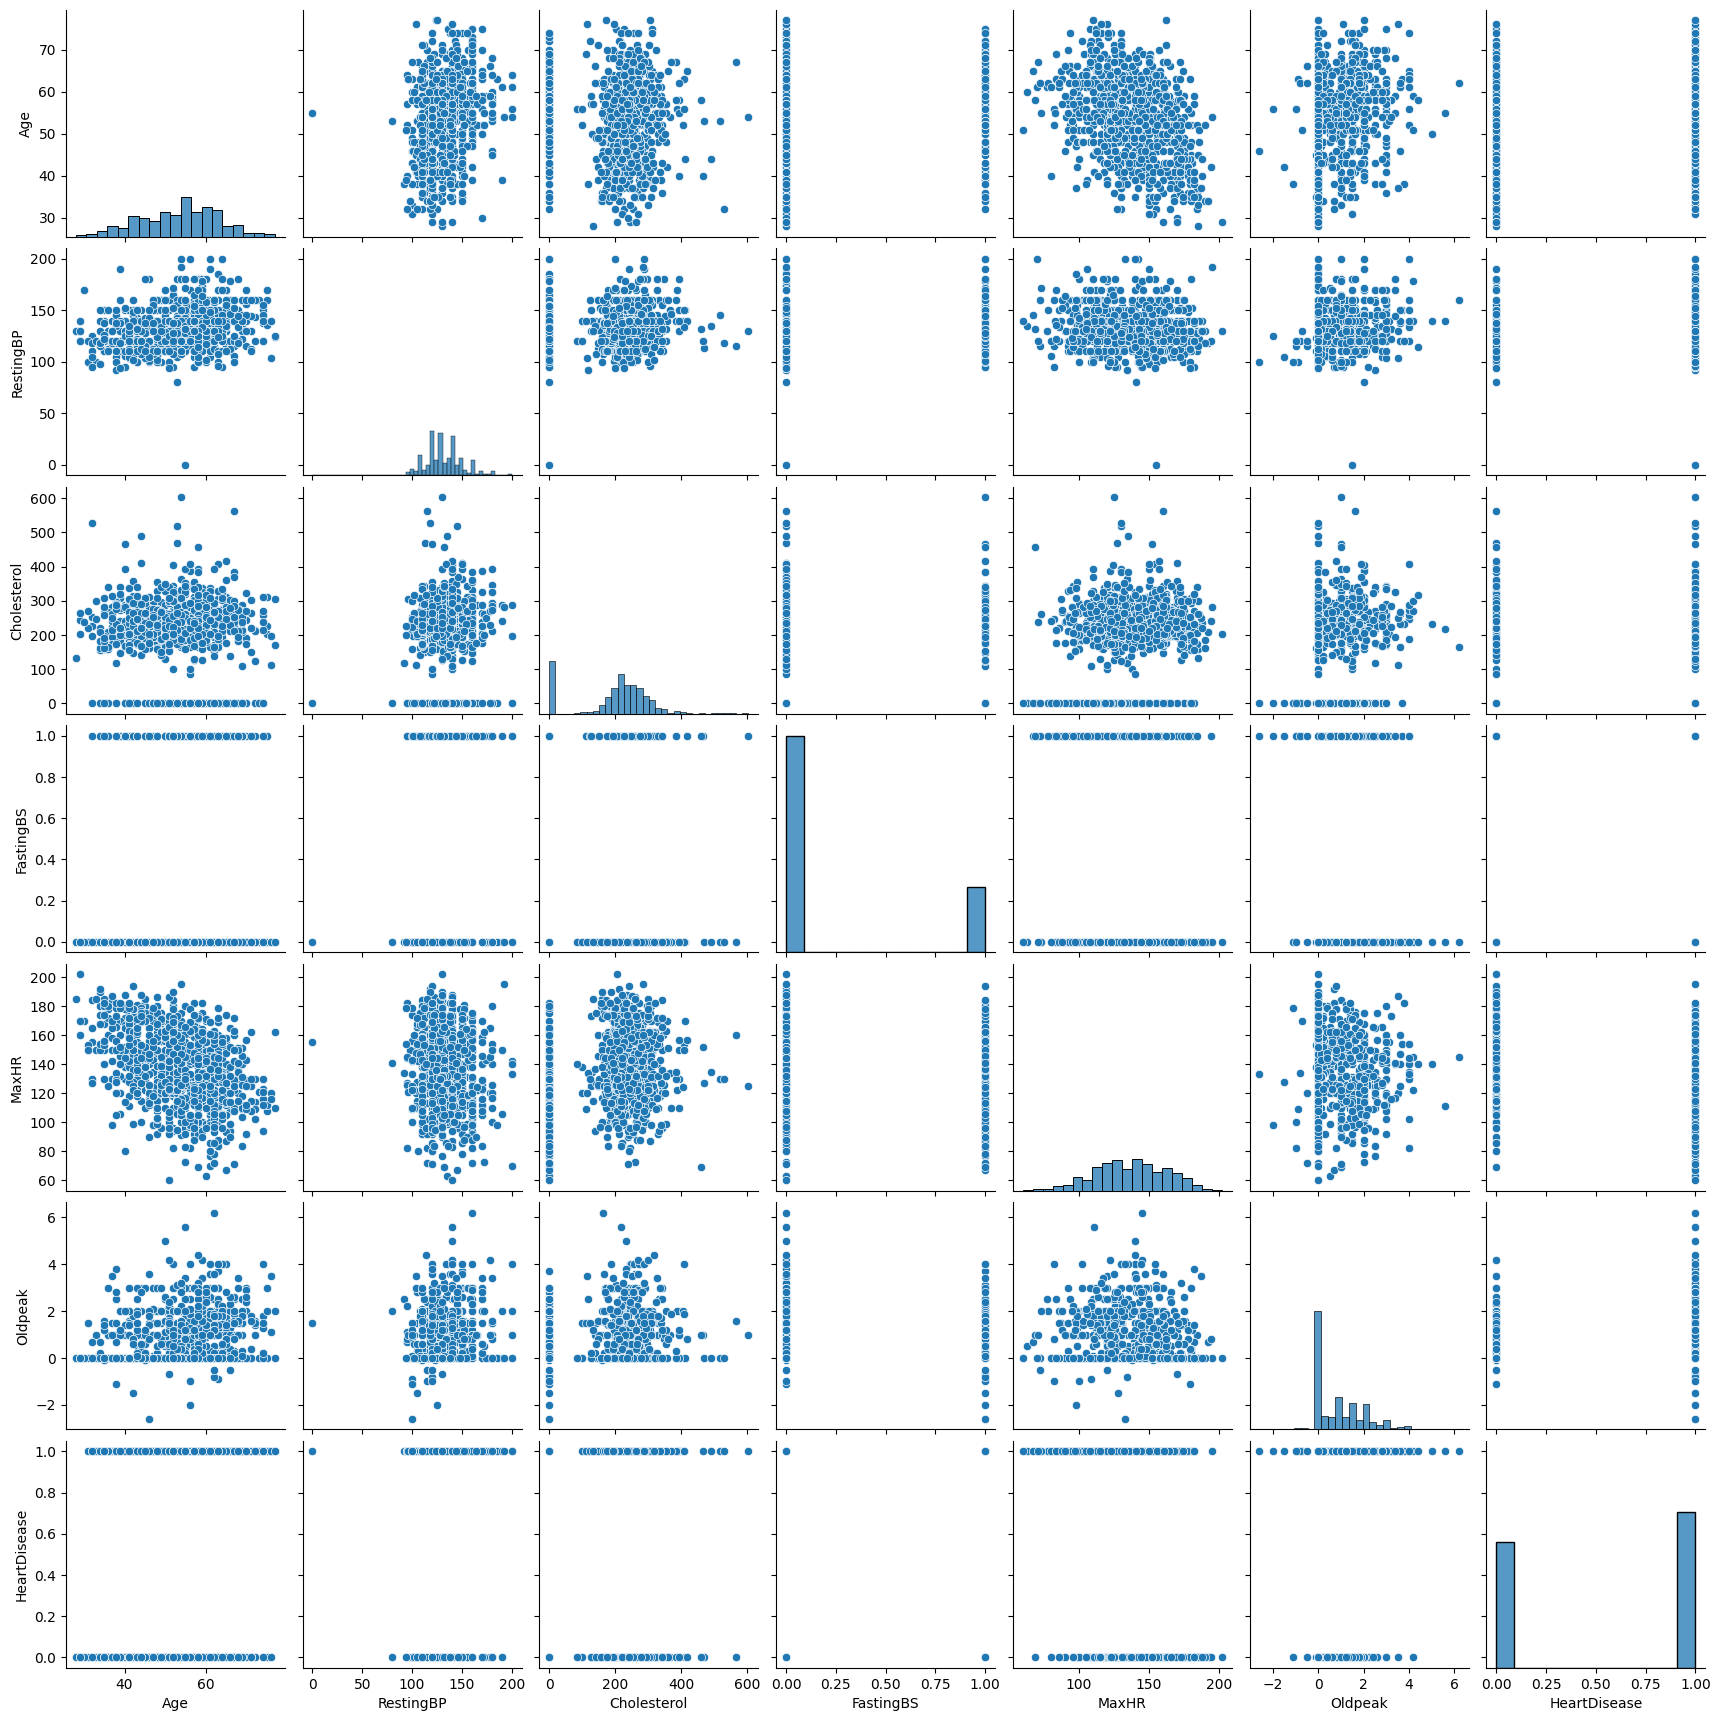

In [8]:
sns.pairplot(df)

<Axes: xlabel='HeartDisease', ylabel='count'>

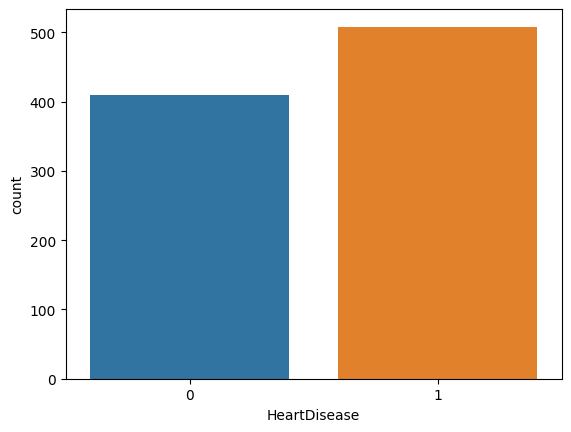

In [9]:
sns.countplot(df,x='HeartDisease')

Almost balanced dataset

# Age

<Axes: xlabel='Age', ylabel='Count'>

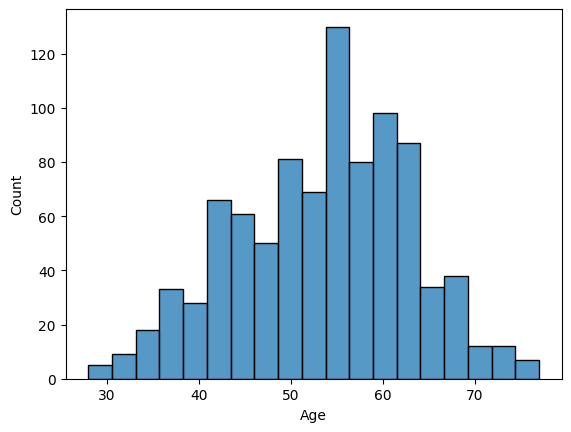

In [10]:
sns.histplot(df,x='Age')

Normally distributed Age column

### Age and HeartDisease

<Axes: xlabel='HeartDisease', ylabel='Age'>

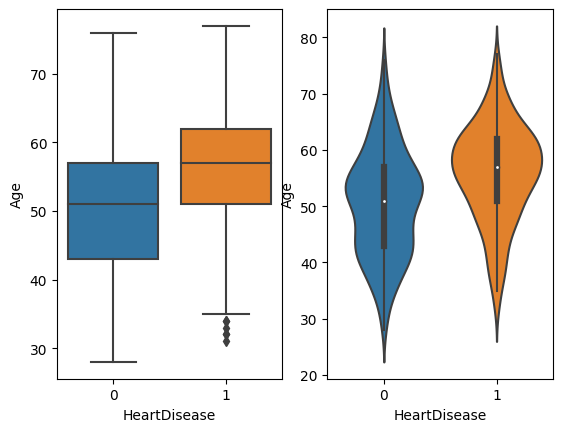

In [11]:
plt.figure()
plt.subplot(121)
sns.boxplot(df, x='HeartDisease',y='Age')
plt.subplot(122)
sns.violinplot(df,x='HeartDisease',y='Age')

There are high chances to have heart disease if you are above 50 years

### Age and ChestPainType

<Axes: xlabel='ChestPainType', ylabel='Age'>

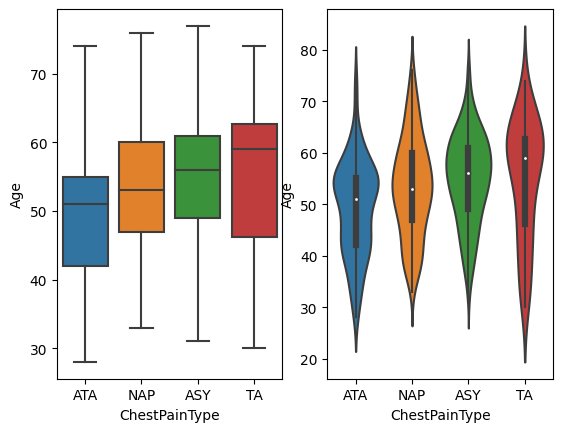

In [12]:
plt.subplot(121)
sns.boxplot(df, x='ChestPainType',y='Age')
plt.subplot(122)
sns.violinplot(df,x='ChestPainType',y='Age')

1. As a person grows older they have high chances of chestpain type 'TA'
2. Most of the them are having chestpain type 'TA'.
3. Younger people are having chestpain type 'ATA'

### Age and RestingBP

<Axes: xlabel='Age', ylabel='MaxHR'>

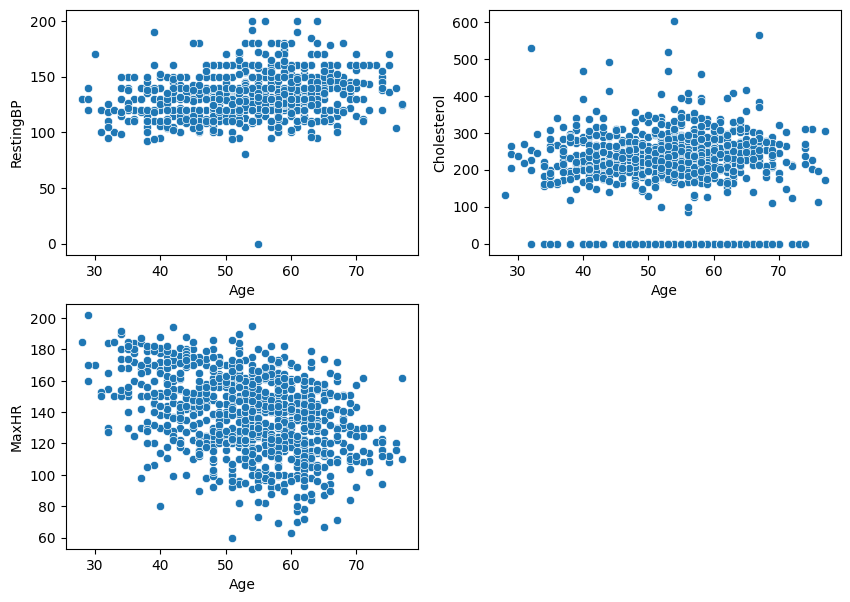

In [13]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.scatterplot(df,x='Age',y='RestingBP')
plt.subplot(222)
sns.scatterplot(df,x='Age',y='Cholesterol')
plt.subplot(223)
sns.scatterplot(df,x='Age',y='MaxHR')

1. There are some people who are having cholestrol as zero which is not possible, there could be some mistake.
2. Heart rate decreases when we grow old.

<Axes: xlabel='RestingECG', ylabel='Age'>

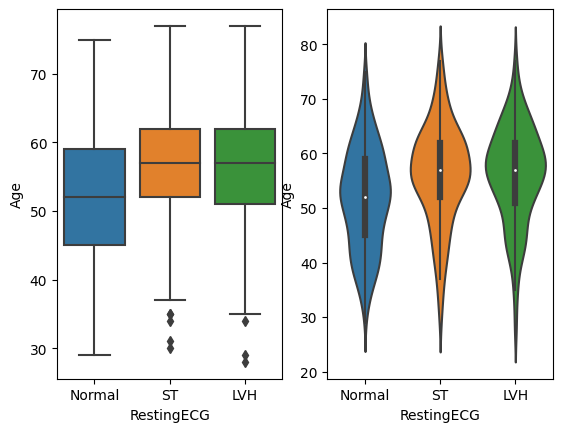

In [14]:
plt.subplot(121)
sns.boxplot(df, x='RestingECG',y='Age')
plt.subplot(122)
sns.violinplot(df,x='RestingECG',y='Age')

1. When a person is above 55 then Resting ECG is most probalbly be 'ST' or'LVH'

<Axes: xlabel='ExerciseAngina', ylabel='Age'>

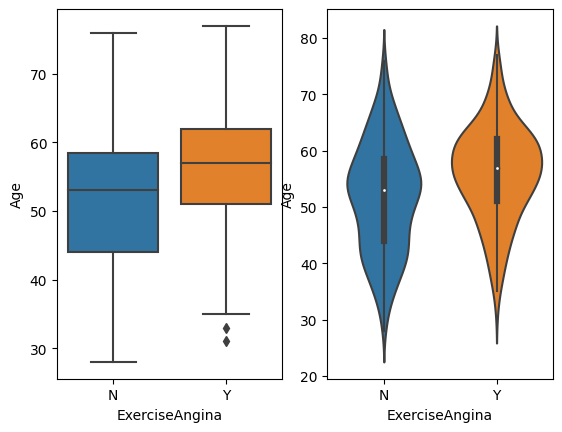

In [15]:
plt.subplot(121)
sns.boxplot(df, x='ExerciseAngina',y='Age')
plt.subplot(122)
sns.violinplot(df,x='ExerciseAngina',y='Age')

1. People above 55 years are having ExcersiseAngina 

<Axes: xlabel='ST_Slope', ylabel='Age'>

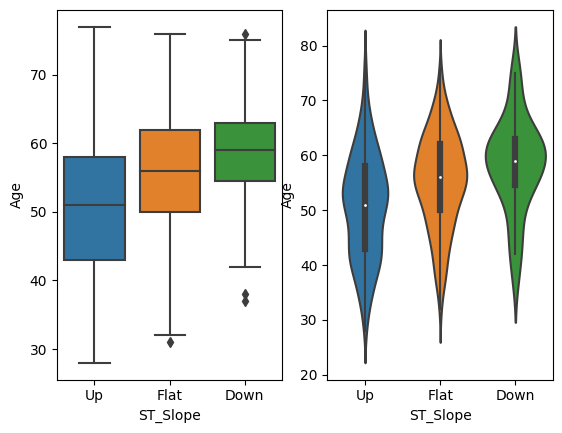

In [16]:
plt.subplot(121)
sns.boxplot(df, x='ST_Slope',y='Age')
plt.subplot(122)
sns.violinplot(df,x='ST_Slope',y='Age')

1. People above 50 are having ST_Slope as Flat and Down.
2. People above 55 are having ST_Slope as Down.

# Sex

<Axes: xlabel='Sex', ylabel='count'>

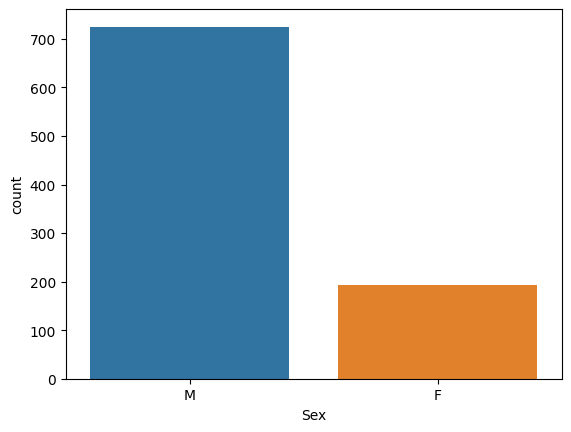

In [17]:
sns.countplot(df,x='Sex')

1. Majority of data belongs to males.

<Axes: xlabel='ST_Slope', ylabel='count'>

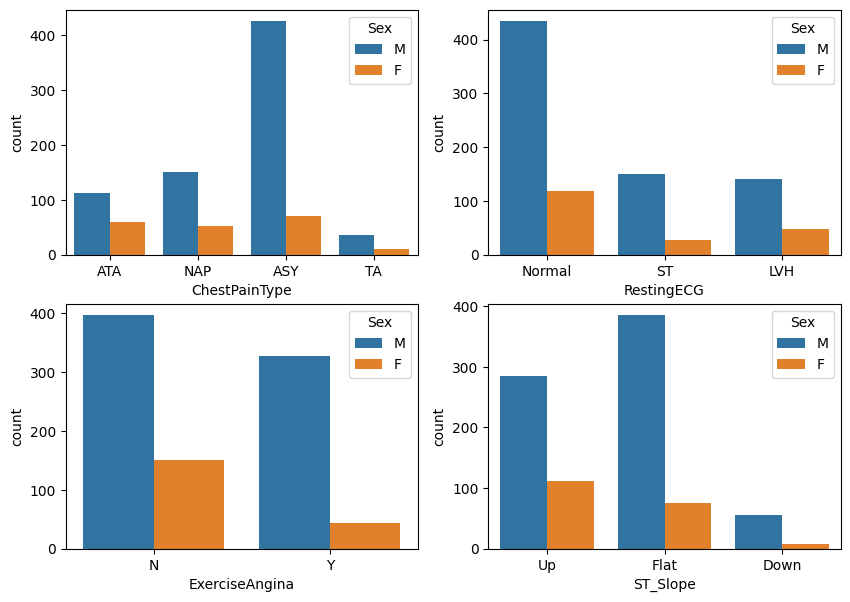

In [18]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.countplot(df,x='ChestPainType',hue='Sex')
plt.subplot(222)
sns.countplot(df,x='RestingECG',hue='Sex')
plt.subplot(223)
sns.countplot(df,x='ExerciseAngina',hue='Sex')
plt.subplot(224)
sns.countplot(df,x='ST_Slope',hue='Sex')

1. Majority of people have 'ASY' kind of chestpain.
2. RestingECG is normal in most of the people.
3. Very less people have 'Down' ST_Slope

<Axes: xlabel='Age', ylabel='Oldpeak'>

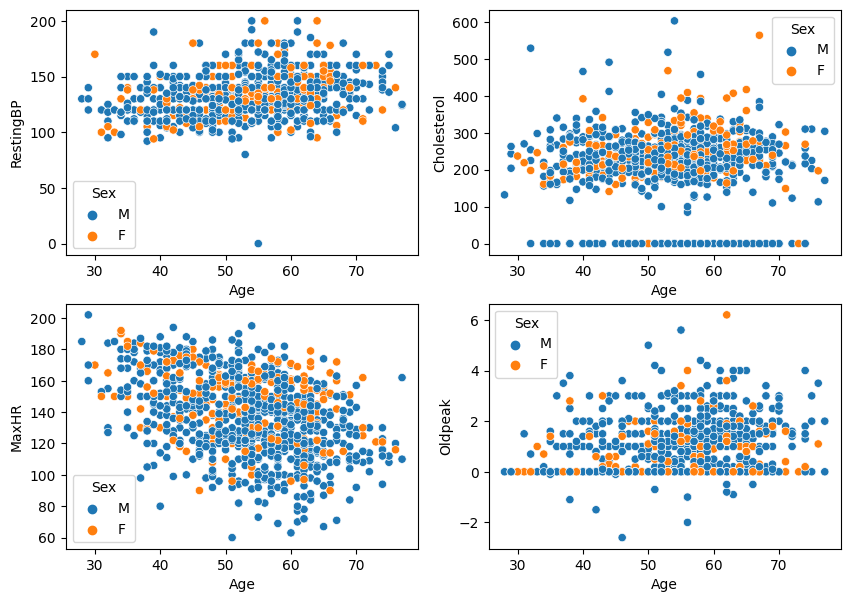

In [19]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.scatterplot(df,x='Age',y='RestingBP',hue='Sex')
plt.subplot(222)
sns.scatterplot(df,x='Age',y='Cholesterol',hue='Sex')
plt.subplot(223)
sns.scatterplot(df,x='Age',y='MaxHR',hue='Sex')
plt.subplot(224)
sns.scatterplot(df,x='Age',y='Oldpeak',hue='Sex')

# ChestPainType

<Axes: xlabel='ChestPainType', ylabel='count'>

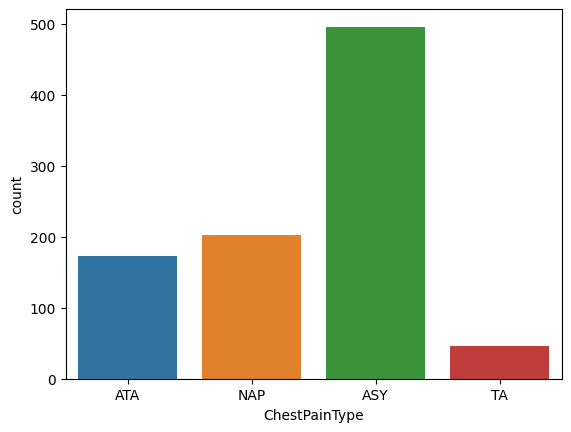

In [20]:
sns.countplot(df,x='ChestPainType')

Most of the people have 'ASY' ChestPainType

<Axes: xlabel='ST_Slope', ylabel='count'>

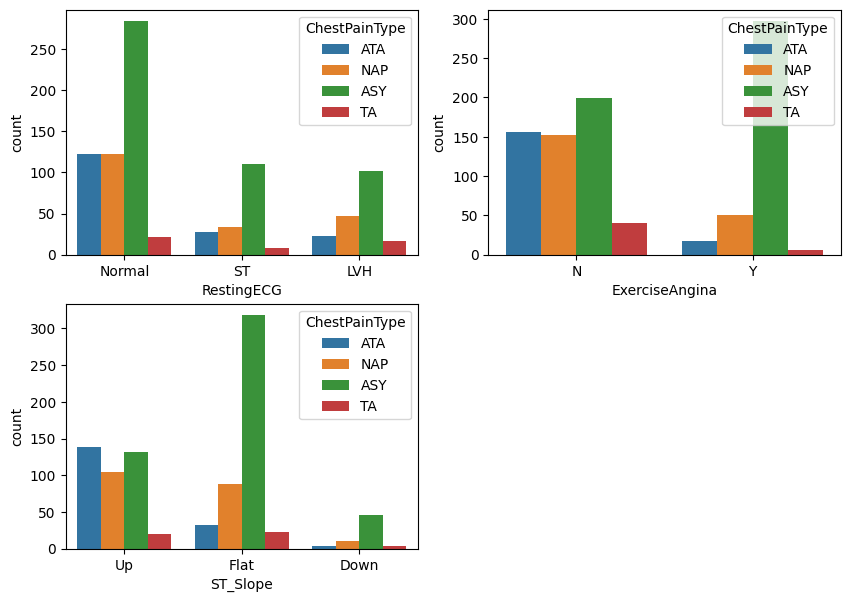

In [21]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.countplot(df,x='RestingECG',hue='ChestPainType')
plt.subplot(222)
sns.countplot(df,x='ExerciseAngina',hue='ChestPainType')
plt.subplot(223)
sns.countplot(df,x='ST_Slope',hue='ChestPainType')

1. In every situation ASY is most dominating.
2. When ST_Slope=Up 'ATA' is eually dominating as 'ASY'.

<Axes: xlabel='Age', ylabel='Oldpeak'>

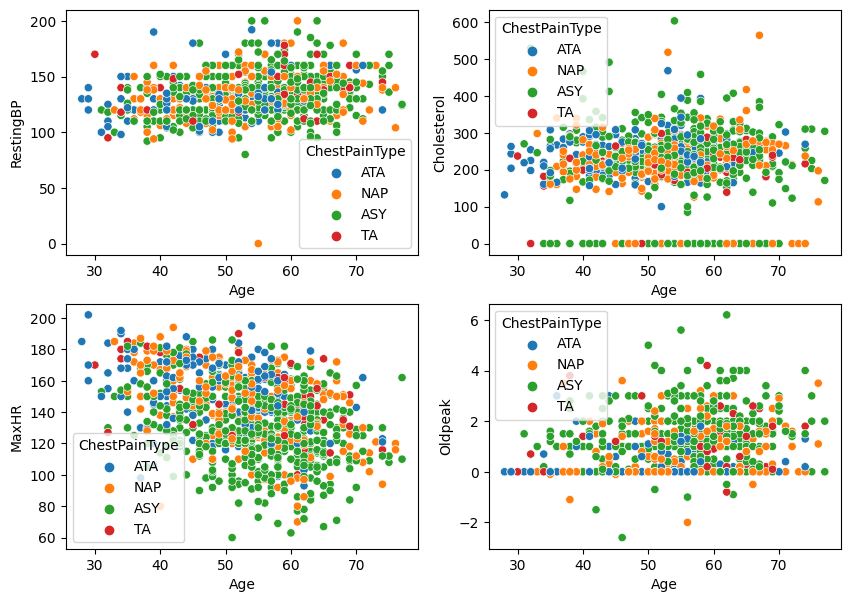

In [22]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.scatterplot(df,x='Age',y='RestingBP',hue='ChestPainType')
plt.subplot(222)
sns.scatterplot(df,x='Age',y='Cholesterol',hue='ChestPainType')
plt.subplot(223)
sns.scatterplot(df,x='Age',y='MaxHR',hue='ChestPainType')
plt.subplot(224)
sns.scatterplot(df,x='Age',y='Oldpeak',hue='ChestPainType')

In [23]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [24]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [25]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [26]:
import pandas as pd

columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [27]:
df_encoded.replace({True:1,False:0},inplace=True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0
